In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import nibabel as nib
from PIL import Image
sys.path.append('../brats/')
from plot_utils import plot_image_row  # noqa: E402

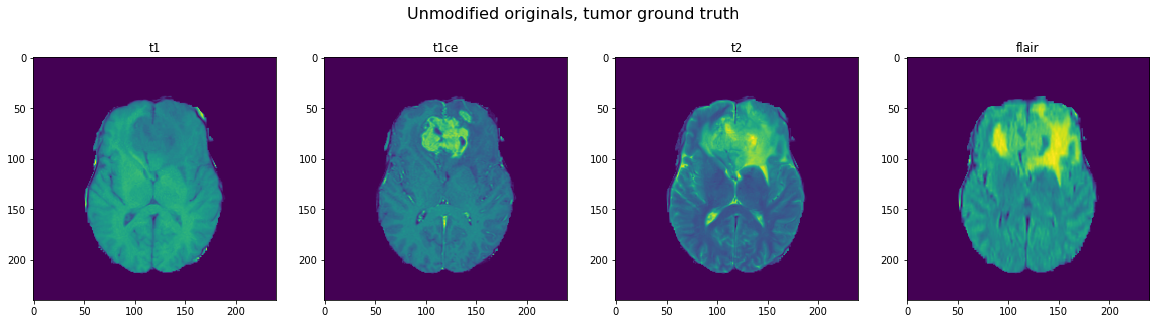

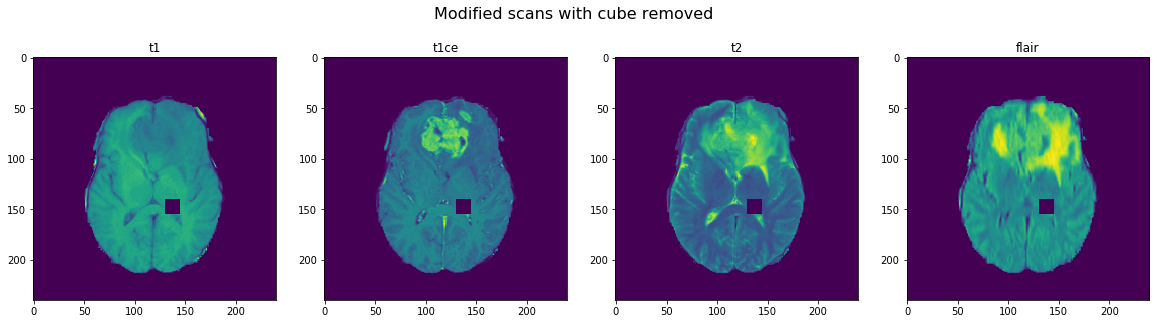

In [2]:
def load_scan(image_path):
    scan = nib.load(image_path)
    scan = scan.get_fdata()
    scan = np.swapaxes(scan, 0, 2)
    return scan


originals = [
    load_scan('images/Brats18_2013_17_1/original/t1.nii.gz')[75],
    load_scan('images/Brats18_2013_17_1/original/t1ce.nii.gz')[75],
    load_scan('images/Brats18_2013_17_1/original/t2.nii.gz')[75],
    load_scan('images/Brats18_2013_17_1/original/flair.nii.gz')[75],
]

segment = load_scan('images/Brats18_2013_17_1/original/seg.nii.gz')[75]

labels = ['t1', 't1ce', 't2', 'flair']

plot_image_row(originals, labels=labels,
               title='Unmodified originals, tumor ground truth')

plot_image_row([
    load_scan('images/Brats18_2013_17_1/t1/13-14-7.nii.gz')[75],
    load_scan('images/Brats18_2013_17_1/t1ce/13-14-7.nii.gz')[75],
    load_scan('images/Brats18_2013_17_1/t2/13-14-7.nii.gz')[75],
    load_scan('images/Brats18_2013_17_1/flair/13-14-7.nii.gz')[75],
], labels=labels, title='Modified scans with cube removed')

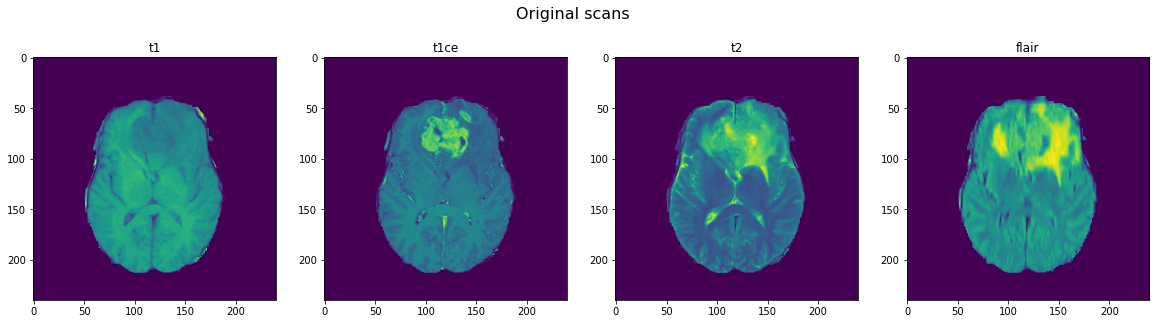

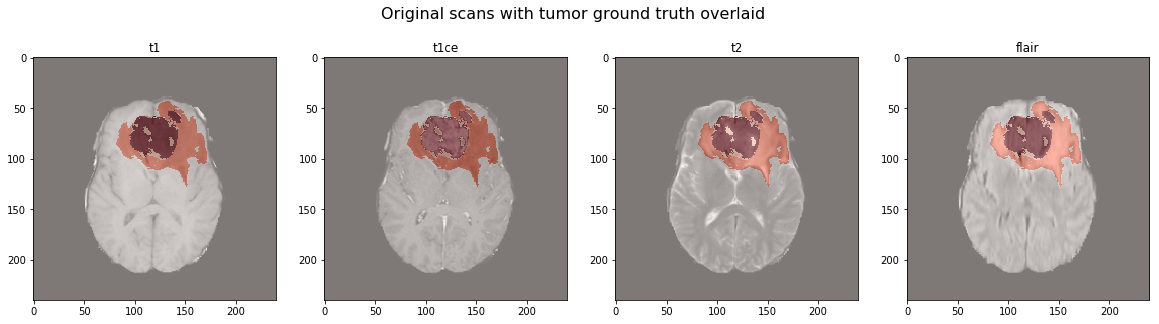

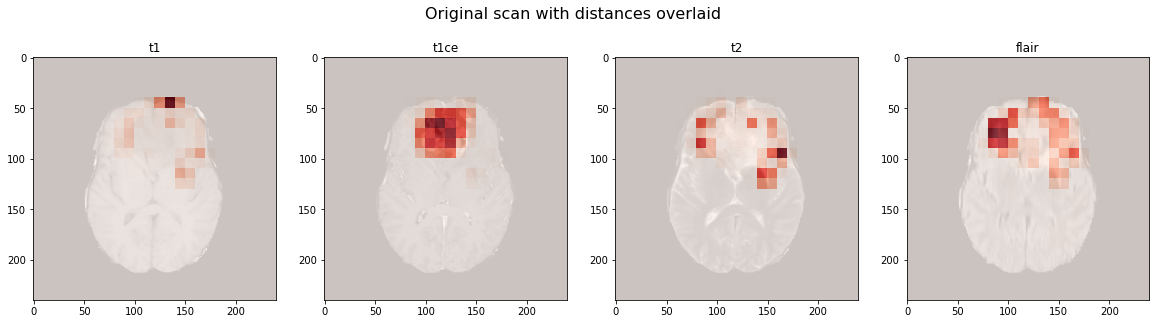

In [3]:
def load_distances(image):
    distances = np.load(image)
    distances = np.swapaxes(distances, 0, 2)
    distances = distances[7]
    distances = np.array(Image.fromarray(distances).resize((240, 240)))
    return distances


distances = [
    load_distances('images/Brats18_2013_17_1/t1.npy'),
    load_distances('images/Brats18_2013_17_1/t1ce.npy'),
    load_distances('images/Brats18_2013_17_1/t2.npy'),
    load_distances('images/Brats18_2013_17_1/flair.npy'),
]

plot_image_row(originals, labels=labels, title='Original scans')
plot_image_row(originals, color_map='gray', overlay=segment, overlay_alpha=0.5,
               labels=labels, title='Original scans with tumor ground truth overlaid')


figure, plots = plt.subplots(1, 4, figsize=(20, 5))
figure.suptitle('Original scan with distances overlaid', fontsize=16)
for i in range(4):
    plots[i].imshow(originals[i], cmap='gray')
    plots[i].imshow(distances[i], alpha=0.8, cmap='Reds')
    plots[i].set_title(labels[i])